# Benchmark FUSE against GASC

In [1]:
using Revise
using FUSE
using Plots; gr();
FUSE.logging(Logging.Info);

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


## Initialize with GASC v1 JSON file (FPPv1.0_aspectRatio3.5_PBpR35.json)

In [2]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);

### Modify select parameters to better match GASC solution

In [3]:
ini.equilibrium.R0 = 4.824
ini.equilibrium.ϵ = 1/3.5
ini.equilibrium.κ = 2.19
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.0

ini.equilibrium.ip = 9.0e6
#ini.material.wall = "Tungsten"
#ini.material.shield = "Steel, Stainless 316"
ini.core_profiles.T_shaping = 3.0
ini.core_profiles.n_shaping = 3.0
ini.core_profiles.greenwald_fraction = 0.95
ini.core_profiles.greenwald_fraction_ped = missing
ini.core_profiles.ne_ped = 1.18e20
ini.core_profiles.impurity = :Kr
ini.core_profiles.zeff = 1.1
ini.pf_active.n_coils_outside = 8


ini.equilibrium.boundary_from = :scalars
ini.equilibrium.xpoints_number = 2



display(ini)

FUSE.ParametersInits{Float64}
├─ general
│  ├─ casename ➡ "FPP_v1_scalars"
│  └─ init_from ➡ :scalars
├─ gasc
│  ├─ filename ➡ "/home/weisbergd/.julia/dev/FUSE/cases/../sample/FPPv1.0_aspectRatio3.5_PBpR35.json"
│  └─ case ➡ 0
├─ ods
│  └─ filename ➡ missing
├─ build
│  ├─ layers[:]
│  ├─ blanket ➡ missing
│  ├─ shield ➡ missing
│  ├─ vessel ➡ missing
│  ├─ plasma_gap ➡ 0.1
│  ├─ symmetric ➡ true
│  └─ n_first_wall_conformal_layers ➡ 100
├─ material
│  ├─ wall ➡ "Steel, Stainless 316"
│  ├─ blanket ➡ "lithium-lead"
│  └─ shield ➡ "Tungsten"
├─ equilibrium
│  ├─ B0 ➡ 4.713052836157584 [T]
│  ├─ R0 ➡ 4.824 [m]
│  ├─ Z0 ➡ 0.0 [m]
│  ├─ ϵ ➡ 0.2857142857142857
│  ├─ κ ➡ 2.19
│  ├─ δ ➡ 0.7
│  ├─ ζ ➡ 0.0
│  ├─ pressure_core ➡ 1.5588036011065182e6 [Pa]
│  ├─ ip ➡ 9.0e6 [A]
│  ├─ xpoints_number ➡ 2
│  ├─ ngrid ➡ 129
│  ├─ field_null_surface ➡ 0.5
│  ├─ boundary_from ➡ :scalars
│  ├─ MXH_params ➡ missing
│  └─ rz_points ➡ missing
├─ core_profiles
│  ├─ greenwald_fraction ➡ 0.95
│  ├─ greenwald_f

### Modify select actor settings to better match GASC solution

In [4]:
act.ActorEquilibrium.model = :CHEASE
act.ActorEquilibrium.symmetrize = true
act.ActorCHEASE.free_boundary = true
act.ActorCXbuild.rebuild_wall = true

act.ActorTauenn.T_shaping = 3.0
act.ActorTauenn.confinement_factor = 0.9

act.ActorCosting.model = :Sheffield

display(act)

FUSE.ParametersActors{Float64}
├─ ActorBalanceOfPlant
│  ├─ generator_conversion_efficiency ➡ 0.95
│  └─ do_plot ➡ false
├─ ActorBlanket
│  ├─ minimum_first_wall_thickness ➡ 0.02 [m]
│  ├─ blanket_multiplier ➡ 1.2
│  ├─ thermal_power_extraction_efficiency ➡ 1.0
│  └─ verbose ➡ false
├─ ActorCHEASE
│  ├─ free_boundary ➡ true
│  ├─ clear_workdir ➡ true
│  └─ rescale_eq_to_ip ➡ true
├─ ActorCXbuild
│  ├─ rebuild_wall ➡ true
│  └─ do_plot ➡ false
├─ ActorCoreTransport
│  └─ model ➡ :Tauenn
├─ ActorCosting
│  ├─ model ➡ :Sheffield
│  ├─ construction_start_year ➡ 2023 [year]
│  ├─ future_inflation_rate ➡ 0.025
│  ├─ plant_lifetime ➡ 40 [year]
│  ├─ availability ➡ 0.8
│  ├─ land_space ➡ 1000.0 [acres]
│  ├─ building_volume ➡ 140000.0 [m^3]
│  ├─ interest_rate ➡ 0.05
│  ├─ indirect_cost_rate ➡ 0.4
│  ├─ escalation_fraction ➡ 0.05
│  ├─ blanket_lifetime ➡ 6.8 [year]
│  ├─ construction_lead_time ➡ 8.0 [year]
│  ├─ fixed_charge_rate ➡ 0.078
│  ├─ initial_cost_blanket ➡ 200.0 [$M]
│  ├─ initial_co

### Run FUSE.init

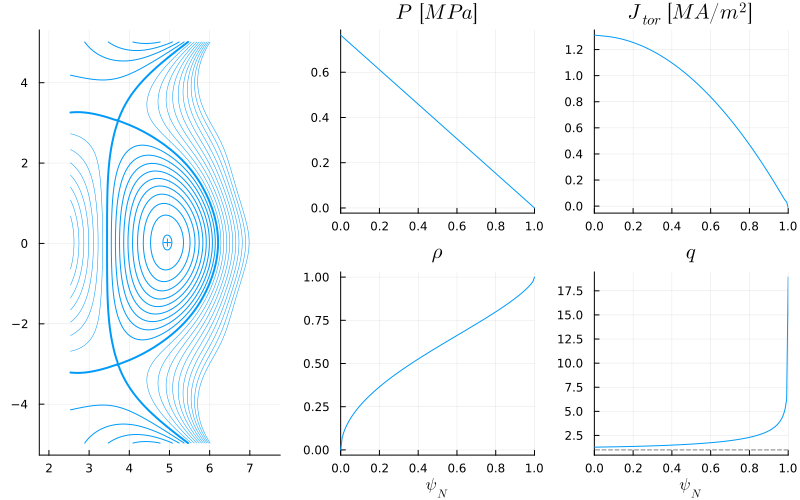

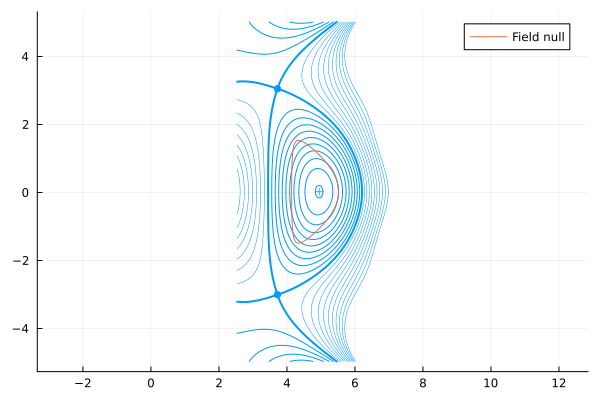

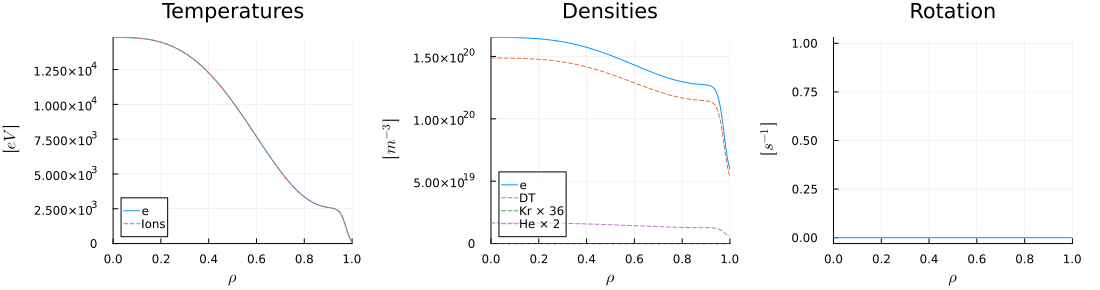

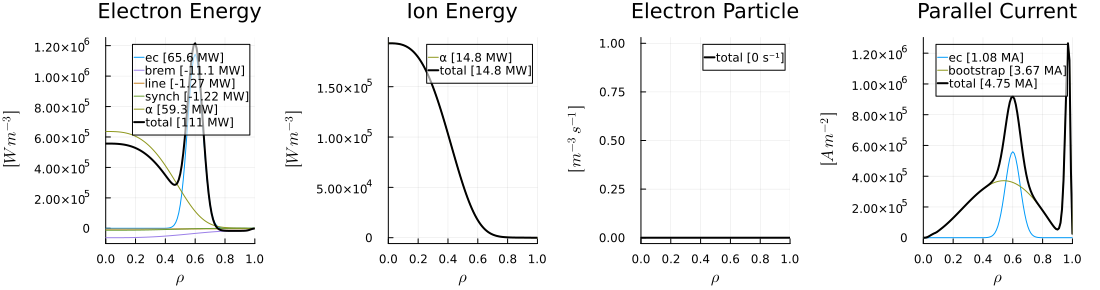

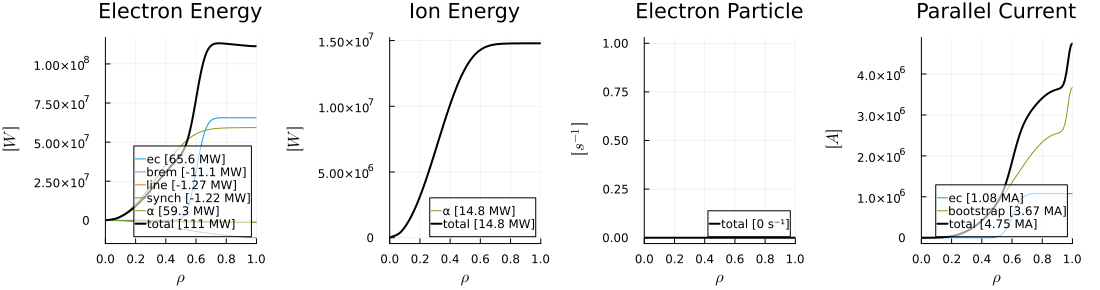

28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19804     0.0       1.19804                15.758       59.3094
   2 │ in                            oh        0.353714    1.19804   1.55176  ReBCO          4.65245     40.1913
   3 │ in                                      0.0696397   1.55176   1.62139                 0.915981     9.13118
   4 │ hfs                           tf        0.310622    1.62139   1.93202  ReBCO         11.4931     117.086
   5 │ hfs                                     0.0696397   1.93202   2.00166                30.3745    1628.32
   6 │ hfs     low temp              shield    0.428631    2.00166   2.43029 

In [5]:
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=true);


## Model entire facility

285.670401 seconds (599.60 M allocations: 19.376 GiB, 2.93% gc time, 31.22% compilation time: 8% of which was recompilation)
GEOMETRY                         EQUILIBRIUM                      TEMPERATURES                     DENSITIES                        
─────────────────────────────    ─────────────────────────────    ─────────────────────────────    ─────────────────────────────    
R0 → 4.82 [m]                    B0 → 4.71 [T]                    Te0 → 29.5 [keV]                 ne0 → 1.65e+20 [m⁻³]             
a → 1.38 [m]                     ip → 8.86 [MA]                   Ti0 → 29.5 [keV]                 ne_ped → 1.18e+20 [m⁻³]          
1/ϵ → 3.5 [m]                    q95 → 5.02                       <Te> → 12 [keV]                  <ne> → 1.38e+20 [m⁻³]            
κ → 2.19                         βpol → 2.94                      <Ti> → 12 [keV]                  ne0/<ne> → 1.2                   
δ → 0.697                        βtor → 0.0747                    Te0/<Te> → 

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.12395     0.0       1.12395                14.0497      49.6096
   2 │ in                            oh        0.503904    1.12395   1.62786  ReBCO          6.29895     54.4548
   3 │ in                                      0.0696397   1.62786   1.6975                  0.870517     9.09421
   4 │ hfs                           tf        0.234521    1.6975    1.93202  ReBCO          7.70222     78.4666
   5 │ hfs                                     0.0696397   1.93202   2.00166                 9.74475    370.851
   6 │ hfs     low temp              shield    0.428631    2.00166   2.4302

​


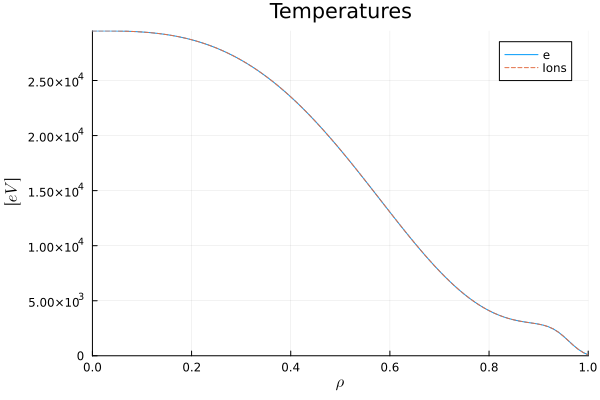

​


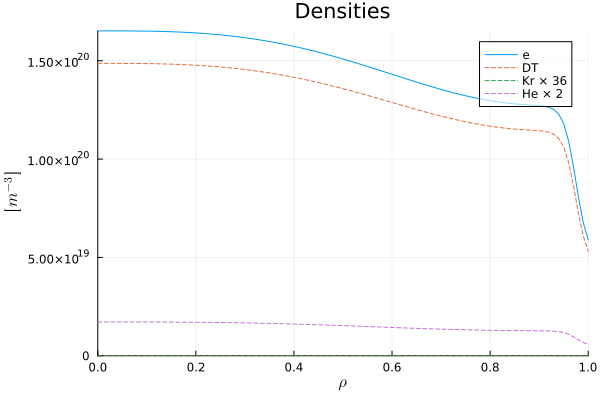

​


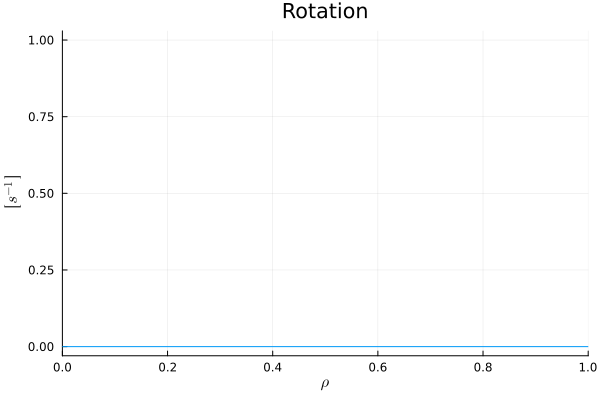

​


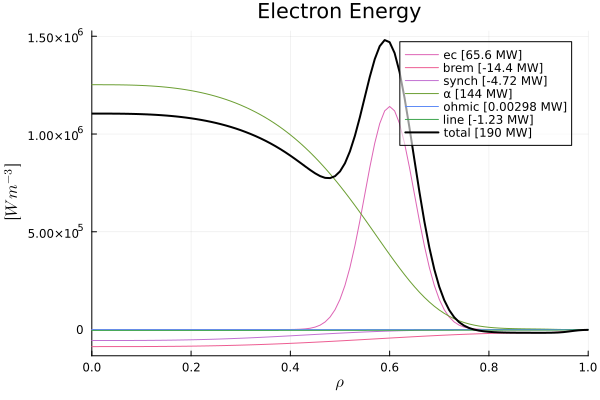

​


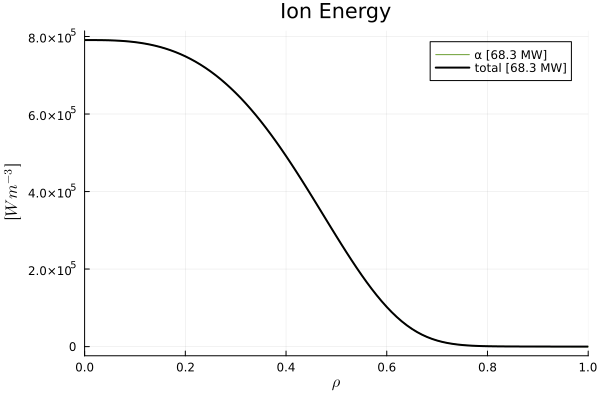

​


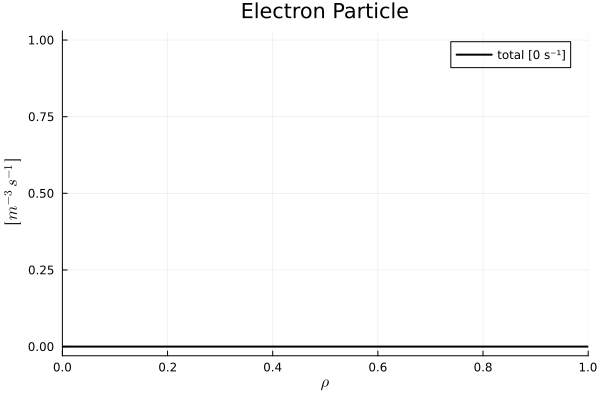

​


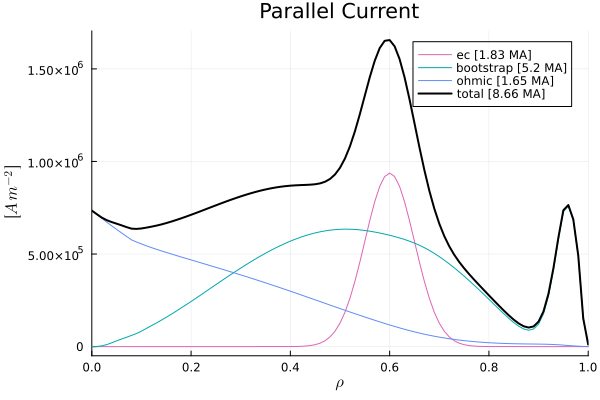

​


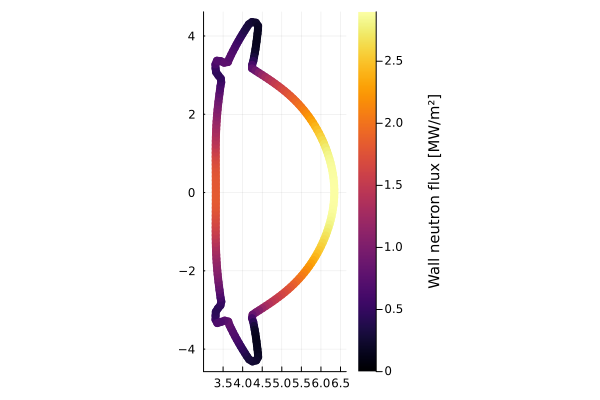

​


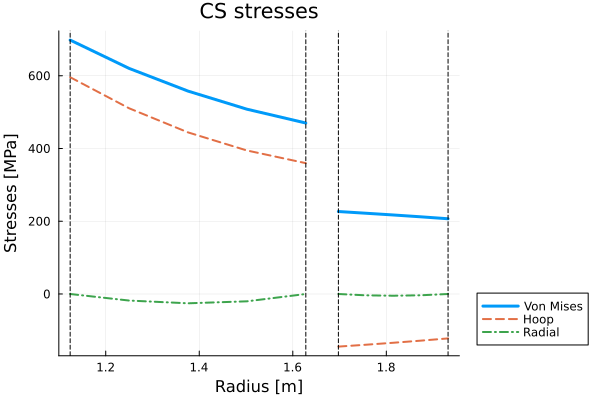

​


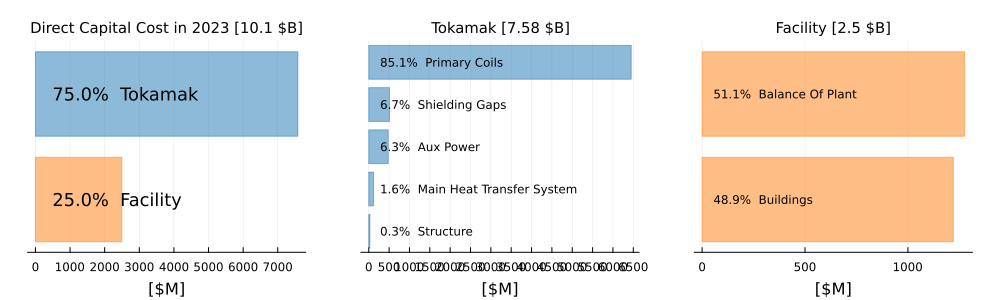

In [6]:
@time FUSE.ActorWholeFacility(dd, act);
FUSE.digest(dd)